# Exploring Dandiset 000673: Control of working memory by phase-amplitude coupling in humans

## Introduction
This notebook provides an introduction to exploring and analyzing data from Dandiset 000673: "Control of working memory by phase-amplitude coupling of human hippocampal neurons". 

**Note**: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please verify all code and interpretations carefully.

### Dataset Overview
This dataset contains electrophysiological recordings (spikes and LFPs) from the medial temporal lobe and medial frontal cortex during a Sternberg working memory task. Key features:
- Subjects performed a working memory task with varying memory loads
- Recordings include single neuron activity and local field potentials
- Data is stored in NWB format for standardized neurophysiology data

For more details, see the original publication and DANDI archive page.

## Setup and Data Access
First we'll set up the required Python imports and connect to the DANDI archive to list available files

In [1]:
from dandi.dandiapi import DandiAPIClient
import pynwb
import lindi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize seaborn for nicer plots
sns.set_theme()

# List assets in the dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("000673")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in Dandiset 000673")

Found 44 assets in Dandiset 000673


## Exploring the NWB File
We'll work with sub-12_ses-1_ecephys+image.nwb which contains electrophysiology data from one session.

In [2]:
# Load the NWB file
nwb_url = "https://lindi.neurosift.org/dandi/dandisets/000673/assets/f3a72b16-6e70-4adf-8384-28224ce212a8/nwb.lindi.json"
f = lindi.LindiH5pyFile.from_lindi_file(nwb_url)
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Basic file info
print("Session description:", nwb.session_description)
print("Identifier:", nwb.identifier)
print("Subject info:", nwb.subject)

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: SBCAT_ID: 12
Identifier: sub-12_ses-1_P70CS
Subject info: subject pynwb.file.Subject at 0x140266910609040
Fields:
  age: P30Y
  age__reference: birth
  description: Subject metadata
  sex: F
  species: Homo sapiens
  subject_id: 12



## Local Field Potential (LFP) Analysis
Let's examine the LFP recordings from this session.

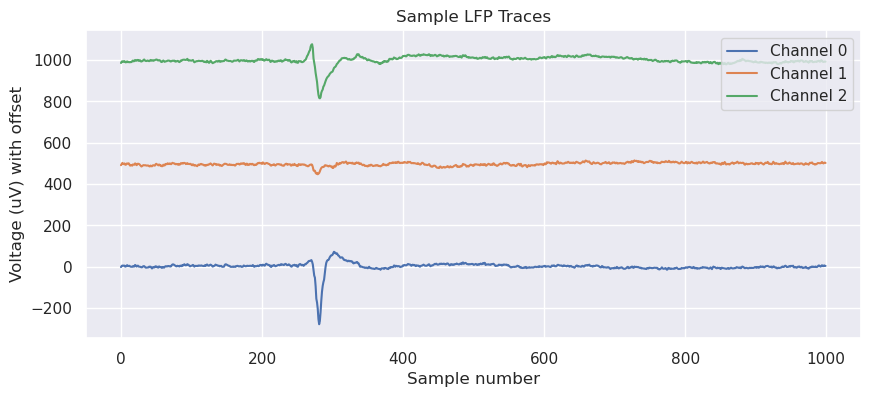

In [3]:
# Get LFP data
lfp_series = nwb.acquisition["LFPs"]
lfp_data = lfp_series.data[:1000, :3]  # First 1000 samples from 3 channels
rate = lfp_series.rate  # 400 Hz

# Plot sample traces
plt.figure(figsize=(10, 4))
for ch in range(3):
    plt.plot(lfp_data[:, ch] + ch*500, label=f'Channel {ch}')
plt.title('Sample LFP Traces')
plt.xlabel('Sample number')
plt.ylabel('Voltage (uV) with offset')
plt.legend()
plt.show()

## Spike Data Analysis
Now let's examine spiking activity from individual neurons.

Found 24 units


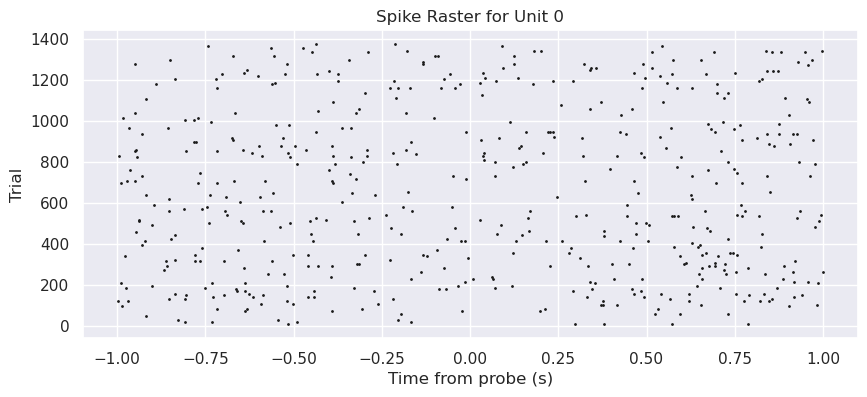

In [4]:
# Get units data
units = nwb.units
unit_ids = units["id"].data[:]
print(f"Found {len(unit_ids)} units")

# Select a unit to analyze
unit_id = unit_ids[0]  # First unit
spike_times = units["spike_times"][unit_id]

# Get trial information
trials = nwb.intervals["trials"]
probe_times = trials["timestamps_Probe"][:]

# Create raster plot
plt.figure(figsize=(10, 4))
for t in probe_times:
    # Plot spikes around probe onset
    mask = (spike_times >= t - 1) & (spike_times <= t + 1)
    rel_spikes = spike_times[mask] - t
    plt.scatter(rel_spikes, np.ones_like(rel_spikes)*t, s=1, color='k')

plt.title('Spike Raster for Unit 0')
plt.xlabel('Time from probe (s)')
plt.ylabel('Trial')
plt.show()

## Behavioral Analysis
Finally, let's examine behavioral performance.

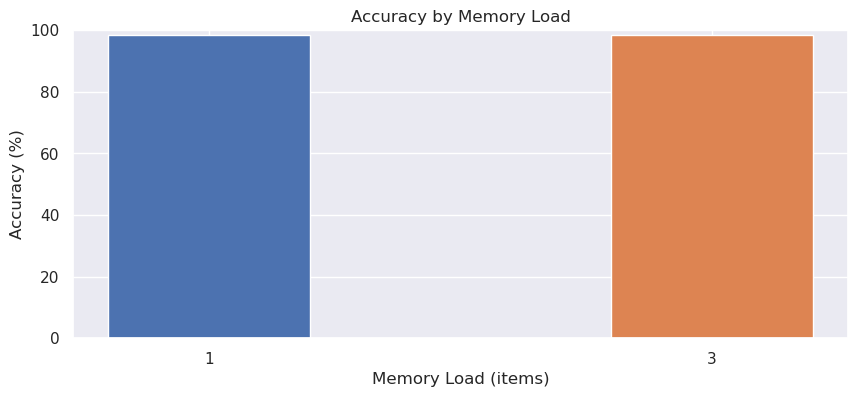

In [5]:
# Get trial metrics
loads = trials["loads"][:]  # Memory loads (1, 2, or 3 items)
accuracy = trials["response_accuracy"][:]  # 1=correct, 0=incorrect
response_times = trials["timestamps_Response"][:] - trials["timestamps_Probe"][:]

# Accuracy by load
load_levels = np.unique(loads)
acc_by_load = [accuracy[loads == l].mean() * 100 for l in load_levels]

plt.figure(figsize=(10, 4))
plt.bar(load_levels, acc_by_load, color=['C0', 'C1', 'C2'])
plt.title('Accuracy by Memory Load')
plt.xlabel('Memory Load (items)')
plt.ylabel('Accuracy (%)')
plt.xticks(load_levels)
plt.ylim(0, 100)
plt.show()

## Conclusion
This notebook has demonstrated basic exploration of Dandiset 000673. Key takeaways:
- Shown how to load and access data from DANDI
- Provided examples of visualizing LFP, spike, and behavioral data
- Demonstrated common analyses for working memory experiments

Further analyses could explore:
- Phase-amplitude coupling between LFP bands
- Unit classification based on response properties
- Detailed trial-by-trial analyses

Remember to verify all code and interpretations before publication.